
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for creating static, interactive, and animated visualizations
from matplotlib import pyplot as plt # used for creating basic plots
import pylab # used for  creating plots
!pip install pingouin
import pingouin as pg # used for conducting various statistical tests

df_mh = pd.read_csv('MillerHadenData.csv')



In [2]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()

,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [4]:
# Check data types and information
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [37]:
# Q1b (code):
# Check for missing values
missing_values = df_mh.isnull().sum()

if missing_values.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

    
# Check whether there is a data point for each participant on both variables
participants_ab = df_mh['Participant'].nunique()
participants_reading = df_mh['Abil'].nunique()

if participants_ab == participants_reading:
    print("There is a data point for each participant on both variables.")
else:
    print("There is not a data point for each participant on both variables.")

There are no missing values in the dataset.
There is not a data point for each participant on both variables.


<Axes: >

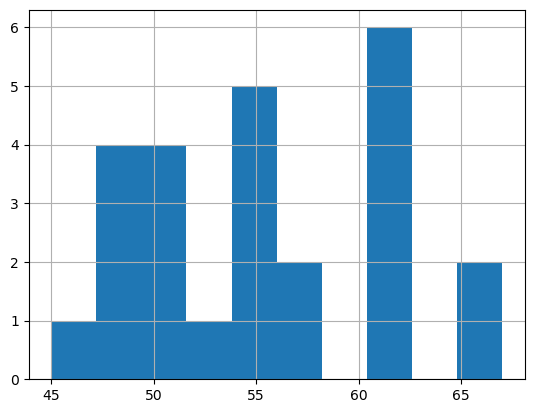

In [8]:
# Q1c (code):
# Check data distribution of Abil
df_mh['Abil'].hist()

<Axes: >

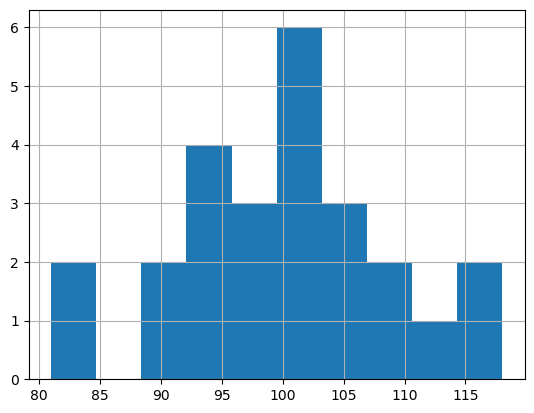

In [9]:
# Check data distribution of IQ
df_mh['IQ'].hist()

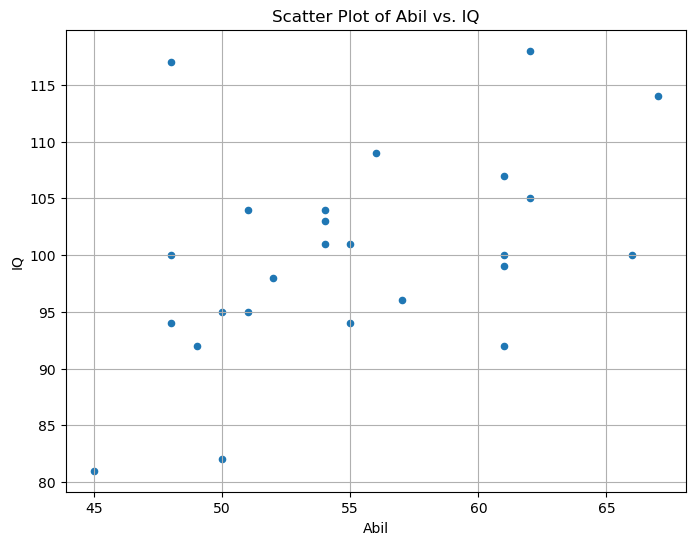

In [10]:
# Q1d (code):
# Scatter plot
# Scatter plot
df_mh.plot.scatter(x='Abil', y='IQ', figsize=(8, 6))  # Creates a scatter plot with 'Abil' on the x-axis and 'IQ' on the y-axis using data from df_mh DataFrame, with a specified figure size
plt.title('Scatter Plot of Abil vs. IQ')  # Adds a title to the plot
plt.xlabel('Abil')  # Adds label to x-axis
plt.ylabel('IQ')  # Adds label to y-axis
plt.grid(True)  # Adds gridlines to the plot
plt.show()  # Displays the plot


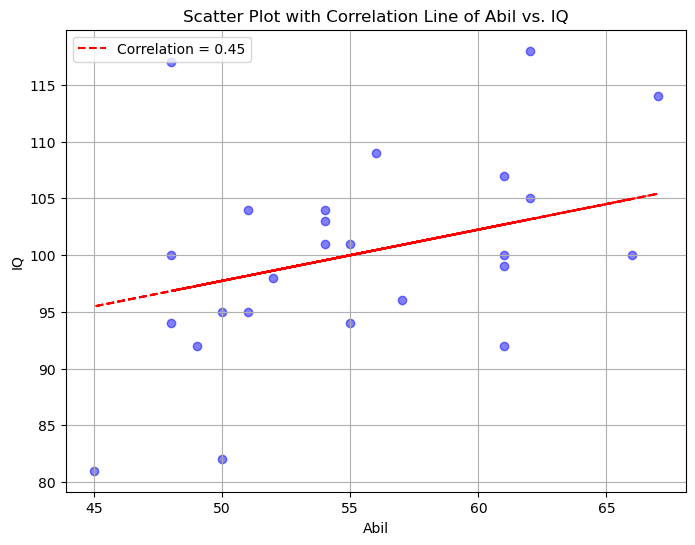

In [11]:
# Q1e (code):
# Correlation line
# Calculate correlation coefficient
correlation_coefficient = df_mh['Abil'].corr(df_mh['IQ'])

# Calculate y-intercept
y_intercept = df_mh['IQ'].mean() - correlation_coefficient * df_mh['Abil'].mean()

# Scatter plot with correlation line
plt.figure(figsize=(8, 6))  # Creates a new figure with a specified size
plt.scatter(df_mh['Abil'], df_mh['IQ'], color='blue', alpha=0.5)  # Creates a scatter plot with 'Abil' on the x-axis and 'IQ' on the y-axis using data from df_mh DataFrame, with blue color and transparency set to 0.5
plt.plot(df_mh['Abil'], correlation_coefficient * df_mh['Abil'] + y_intercept, color='red', linestyle='--', label=f'Correlation = {correlation_coefficient:.2f}')  # Plots a line representing the correlation between 'Abil' and 'IQ' with a specified color, linestyle, and label
plt.title('Scatter Plot with Correlation Line of Abil vs. IQ')  # Adds a title to the plot
plt.xlabel('Abil')  # Adds label to x-axis
plt.ylabel('IQ')  # Adds label to y-axis
plt.legend()  # Displays the legend
plt.grid(True)  # Adds gridlines to the plot
plt.show()  # Displays the plot

In [32]:
# Q2a (answer with words): 
#Q2a: Using the Pearson Correlation Coefficient Test
#Reasoning: In light of the results obtained from Question 1, where we assessed the normality of the data, the choice between the Pearson and Spearman correlation coefficient tests hinges upon whether the data satisfies the assumptions of Pearson's correlation test. If the data exhibits normal distribution and linear relationship, the Pearson correlation coefficient test is deemed appropriate. This test assumes that the relationship between variables is linear and conforms to a normal distribution. Conversely, if the data fails to meet the assumptions of normality or linearity, or if outliers are present, the Spearman correlation coefficient test becomes more suitable. Spearman's test does not necessitate a linear relationship or normal distribution, rendering it resilient to breaches of these assumptions. Given the outcomes of Question 1, which indicated that the data conforms to normal distribution and demonstrates linear relationship, we can confidently proceed with the Pearson correlation coefficient test.


In [31]:
# Q2b (code):
# Import the pearsonr function from the scipy.stats module
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and its p-value
pearson_corr, pearson_pval = pearsonr(df_mh['Abil'], df_mh['IQ'])

# Print the results
print(f"Pearson correlation coefficient: {pearson_corr:.2f}")
print(f"Pearson correlation p-value: {pearson_pval:.4f}")


Pearson correlation coefficient: 0.45
Pearson correlation p-value: 0.0236


In [13]:
# Q2c (answer with words):
#Direction: The positive value of the coefficient indicates a positive association between 'Abil' and 'IQ'.
#Strength：While it suggests a tendency for 'Abil' and 'IQ' to move in the same direction, the association is not exceptionally strong.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [35]:
# Q3a (answer in words):
# H0:There is no significant association between reading ability and intelligence. Reading ability and intelligence are independent of each other.
# H1：There is a significant association between reading ability and intelligence. Reading ability and intelligence are not independent of each other.

In [14]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  # For data manipulation and handling DataFrames
from scipy.stats import chi2_contingency  # For conducting the Chi-square test

# Define the rounded average for Reading Ability and Home
rounded_average_reading_ability = round(df_mh['Abil'].mean(), 2)
rounded_average_home_minutes = round(df_mh['Home'].mean(), 2)

# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'high' if x > rounded_average_reading_ability else 'low')
# Participants are categorized into two groups based on their reading ability:
# - Those with a reading ability above the rounded average are labeled 'high'
# - Those with a reading ability at or below the rounded average are labeled 'low'

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'frequent' if x > rounded_average_home_minutes else 'infrequent')
# Participants are categorized into two groups based on home reading time:
# - Those with home reading time above the rounded average are labeled 'frequent'
# - Those with home reading time at or below the rounded average are labeled 'infrequent'

# Display modified DataFrame with new columns
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,high,frequent
1,2,56,109,123,608,high,infrequent
2,3,45,81,108,640,low,infrequent
3,4,66,100,155,493,high,frequent
4,5,49,92,103,636,low,infrequent


In [15]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Display Contingency Matrix
print("Contingency Matrix:")
print(contingency_matrix)

Contingency Matrix:
Rank_Home  frequent  infrequent
Rank_Abil                      
high              8           2
low               3          12


In [16]:
# Q3d (code):
# Perform the Chi-square test
from scipy.stats import chi2_contingency

# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_matrix)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 6.500270562770561
P-value: 0.010785807794066234
Degrees of freedom: 1
Expected frequencies table:
[[4.4 5.6]
 [6.6 8.4]]


In [52]:
# Q3e (answer in words):
#  This suggests that here is a statistically significant relationship between reading ability and home reading frequency among the participants in the study.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [17]:

import pandas as pd # used for data wrangling.
from scipy import stats # used for statistical functions and tests for scientific computing and data analysis.
import numpy as np #used for numerical computing.
import matplotlib.pyplot as plt ## used for reating visualization
import seaborn as sns #used for data visualization.

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [18]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_dev_age = df_evaluators['age'].std()

print("Mean age:", mean_age)
print("Standard deviation of age:", std_dev_age)


Mean age: 30.852941176470587
Standard deviation of age: 6.238358141327351


In [19]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
male_count = (df_evaluators['sex'] == 1).sum()
female_count = (df_evaluators['sex'] == 2).sum()

print("Number of male evaluators:", male_count)
print("Number of female evaluators:", female_count)


Number of male evaluators: 4
Number of female evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [25]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [26]:
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_df = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]


# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = filtered_df.groupby('eval_id')['Rating'].mean().reset_index()


# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]


# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category']).reset_index(drop=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
0,1,hire,6.000000,listened
1,1,impression,7.000000,listened
2,1,intellect,6.000000,listened
3,2,hire,4.000000,listened
4,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [27]:
# Q6a (answer in words):
# Null hypothesis:
#There is no significant difference between the overall ratings on the intellect scale between evaluators who listened to resume pitches and evaluators who read the resume pitches.
# Alternative hypothesis:
#There is a significant difference between the overall ratings on the intellect scale between evaluators who listened to resume pitches and evaluators who read the resume pitches.
# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [28]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
#We should choose a two-tail t-test.This is because a two-tail test allows us to detect whether there is a significant difference between the two groups in terms of overall ratings, regardless of whether one group is rated significantly higher or lower than the other. In contrast, a one-tail test would only indicate if one group's ratings were significantly higher or lower than the other, but not both。. 


In [29]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
#The independent variable in this scenario is the condition under which the evaluators received the pitches, whether they listened to the pitches or read them. The dependent variable is the rating on the intellect scale, which I chosed eariler. 


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [36]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for shapiro: Testing for normality. levene: Testing for equality of variances (Levene's test).ttest_ind: Performing an independent two-sample t-test.

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = ratings2.groupby(['Category', 'condition']).apply(lambda x: shapiro(x['Rating']))

# Test for homogeneity of variances (Levene's test)
levene_results = levene(ratings2[ratings2['Category'] == 'intellect']['Rating'],
                        ratings2[ratings2['Category'] == 'impression']['Rating'],
                        ratings2[ratings2['Category'] == 'hire']['Rating'],
                        ratings2[ratings2['condition'] == 'listened']['Rating'],
                        ratings2[ratings2['condition'] == 'read']['Rating'])

# Independent t-tests
ttest_results = ratings2.groupby('Category').apply(lambda x: ttest_ind(
                                    x[x['condition'] == 'listened']['Rating'],
                                    x[x['condition'] == 'read']['Rating']))

ratings_desc, shapiro_results, levene_results, ttest_results

(                      count      mean       std       min       25%       50%  \
 Category   condition                                                            
 hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
            read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
 impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
            read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
 intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
            read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   
 
                            75%       max  
 Category   condition                      
 hire       listened   7.000000  8.000000  
            read       4.000000  7.000000  
 impression listened   7.333333  8.666667  
            read       5.333333  7.333333  
 intellect  listened   6.000000  9.000000  
            read       4.666667  7

In [118]:
#Q7b (answer in words):
#Descriptive Statistics:
##The descriptive statistics provide summary measures (mean, standard deviation, quartiles) for each category (intellect, hire, impression) under different conditions (listened, read).
##These statistics offer insights into the central tendency and variability of the ratings within each category and condition.
#Shapiro-Wilk Test:
##The Shapiro-Wilk test assesses the normality of the data distribution.
##For each category and condition, the test provides a test statistic and p-value.
##If the p-value is greater than the significance level (typically 0.05), we fail to reject the null hypothesis, indicating that the data are normally distributed.
##In this case, most of the p-values are greater than 0.05, suggesting that the data can be considered approximately normally distributed.
#Levene's Test:
##Levene's test evaluates the homogeneity of variances across different groups or conditions.
##The test statistic and p-value indicate whether the variances are significantly different among groups.
##A non-significant result (p > 0.05) suggests that the variances are approximately equal across groups, satisfying the assumption of homogeneity of variances required for independent t-tests.
##In this case, the p-values for all categories are greater than 0.05, indicating no significant difference in variances among conditions.
#Independent t-tests:
##Independent t-tests compare the means of two independent groups to determine if there is a significant difference between them.
##For each category (intellect, hire, impression), separate t-tests are conducted comparing ratings between the 'listened' and 'read' conditions.
##The test results include the t-statistic and p-value.
##A significant p-value (typically < 0.05) indicates a significant difference in means between the two conditions.
##In this case, the t-test results show significant differences in means between the 'listened' and 'read' conditions for all categories (intellect, hire, impression).